# Intro to Gravitational Waves: Finding LIGO's First Chirp
**Mini Lecture and Lab on using LIGO Data to Analyze Gravitational Waves**

Authors: Alicia Roberts and Evie Currington


 _The code for this leture is greatly influenced from the tutorials from the LIGO that can be found in the sources section of this document. Without their open source material, we would not have been able to complete this lab in its entirety._

## Section 1: Background and History
In this section, you will learn:

1.   What are Gravitational Waves?
2.   The Gravitational Waves Metric
3.   How LIGO Works
4.   Understanding Noise


### 1. Gravitational Waves
Anything that accelerates generates gravitational waves. Gravitational waves are invisible and travel at the speed of light, stretching and squeezing space time as they propagate. The strength of gravitational waves are directly proportional to the mass of the accelerating object. Black hole mergers are one of the strongest sources of gravitational waves.

**Below is a video from LIGO that shows how gravitional waves are created and propagate through space:**

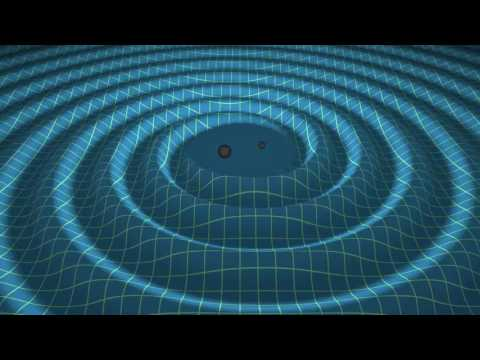

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('zLAmF0H-FTM') # -A!

As you can see, the waves stop once the merger happens!

For gravitaional waves to be produced it requires a quadrupole (ie two regions of mass with two regions with no mass). So this means that in the absence of this quadrupole, there are no significant gravitational waves that we would be able to observe from Earth.

### 2. The Metric:

The general equation for gravitational waves propagating through a field in the $\hat{z}$ direction can be represented as:

$$ds^2 = -c^2dt^2 + [(1 + h(t)]dx^2 + [(1-h(t)]dy^x + dz^2$$

where h (also called the *strain*) is an oscillating function.


**Gravitational Strain**: a dimensionless quantity of the amount that distances are stretched/compressed by a passing gravitational wave, relative to the original length.



The derivation of h is well beyond the scope of this class, but for simplicity we will state that it accounts for the small fluctuations or ripples that gravitational waves leave behind and are similar to a sort of squeezing motion.

You’ll see that x and y have different signs for h, so when x increases, y decreases, leading to the squeezing and stretching of space time in those directions. This corresponds to the polarizations of the waves.

###  3. LIGO - How it works

Gravitational waves are very hard to detect as the fluctuations are very small. LIGO, the Laser Interferometer Gravitational-Wave Observatory, is used to detect gravitational waves with the most precise laser ruler currently possible.

The H1 detector is composed of 2, 4km long arms that are perpendicular to each other. At one end, a strong laser is emitted and split equally down the two arms. If there are no distortions, the lasers will always intersect back at their intersection point at the same time and cancel each other out. Any detection of energy excess from the laser is due to gravitational waves or other distortions. If the change looks to oscillate in time there is greater evidence of gravitational waves, as seen in the theory model of the Gravitational strain. This excess energy is manifested as a burst of light that is perceived from a photodetector.

**Here’s a video of how LIGO works through lasers:**

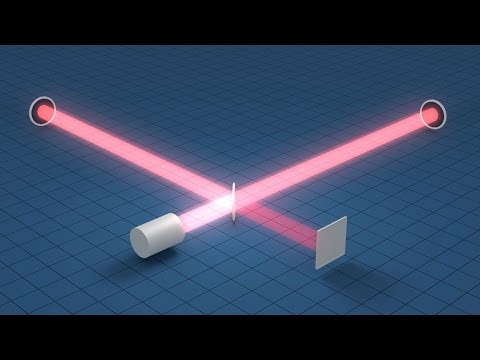

In [ ]:
YouTubeVideo("tQ_teIUb3tE")


### 4. Understanding Noise
Gravitational wave signals are extremely small (1,000 times smaller than the size of a proton), so detection requires very precise machinery and is very vulnerable to natural interference which is detected as noise in the data. The work of statisticians Gauss and Laplace developed a standard for "likelihood" of noise, and LIGO aims to detect and flag deviations from this norm as potential gravitational waves.

Noise can also appear as noise transients, or glitches, which deviate from the gaussian norm. We can better suggest the measuring of gravitational waves by comparing the data from multiple LIGO detectors which are located far away from each other. We filter out noise throughout the analysis process, from examining the spectral density to whitening (to be discussed in section 2).

## Section 2: Implementing LIGO Data

In this section, you will learn:

1.   How to find data on Gravitational Waves from LIGO
2.   How to import and clean the data
3.   Whitening and other visualization techniques

Google Collab uses an older version of matplotlib, so in order to use the whole breadth of the LIGO data, we upgrade the current version using pip install:


In [56]:
!pip install matplotlib --upgrade

In [57]:
# importing necessary libraries for visualizations and data clean up:

import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except: # if you dont already have TimeSeries, this installs it on your notebook
    ! pip install -q "gwpy==3.0.7"
    ! pip install -q "matplotlib==3.5.3"
    ! pip install -q "astropy==6.0.0"
    from gwpy.timeseries import TimeSeries

### 1. Finding LIGO Data

Most of LIGO’s data is publicly available in a database called the Gravitational Wave Open Science Center (GWOSC), so that researchers and professionals may conduct their own analysis. They also provide basic tutorials on how to implement and analyze the raw data. Their website can be found here:  https://gwosc.org/

Each LIGO observation file is split into sections of 4096 seconds (about 68 minutes) and uploaded onto the GWOSC website filed by date and time. While we are constantly receiving gravitational waves, LIGO only detects gravitational waves about 10-20 times per week. We can find the LIGO alerts from the Gravitational-Wave Candidate Event Database (GraceDB), which gives the probability of the type of event and the data files:  https://gracedb.ligo.org/superevents/S240422ed/view/

Using the GWOSC's package, we can locate URLs for data for specific timeframes and detectors. For this lab, we will analyze t0 = 1126259462.4 as recommended by the LIGO open source code on detector H1, which is the Hanford detector in Hanford, Washington.

In [104]:
# -- Set a GPS time:
t0 = 1126259462.4

#-- Choose detector as H1, L1, or V1
detector = 'H1'

In [105]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1] # returns a list of URLs

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  http://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5


### 2. How to Plot and Clean the Data



Now let's plot the strain data! The strain is the oscillations that graviational waves leave on space time as they propegate, which cause space time to stretch and compress. When you plot the data below, you will see the raw time series data.

This data is showing the stretching and compressing of one of the arms of our detector, so in this case we called the 'H1' detector, which refers to the Hanford detector in Hanford, Washington!

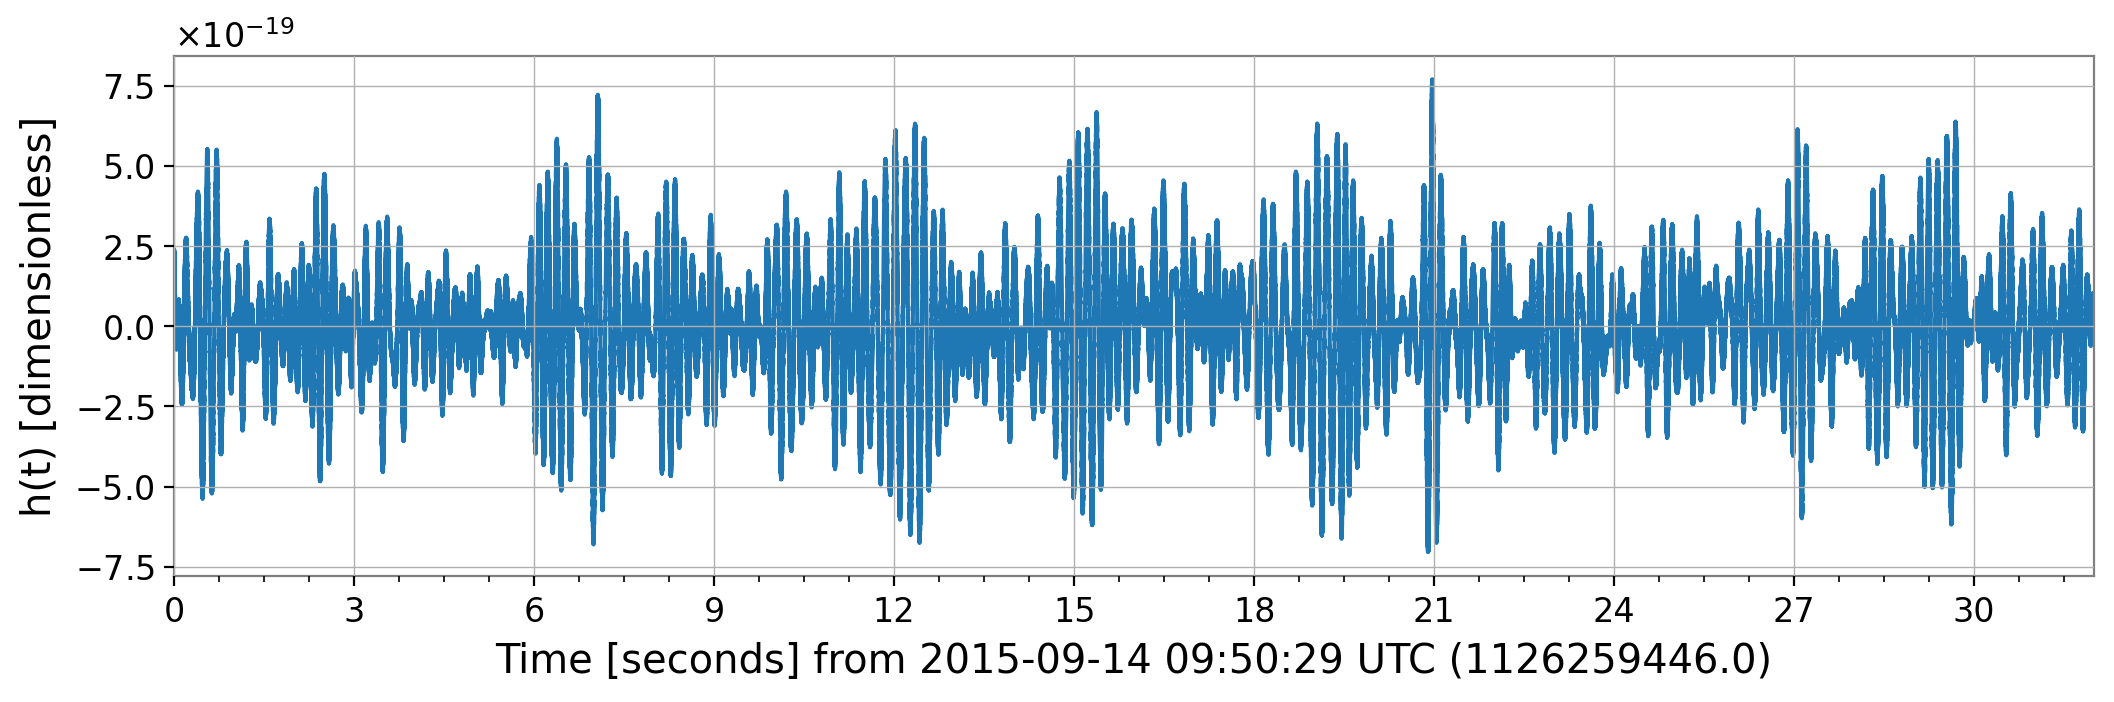

In [106]:
# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.gwosc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()
plt.ylabel('h(t) [dimensionless]')
plt.show()

Now we plot the Amplitude Spectral Density (ASD). This plot shows how the frequency of the stretching/compressing scales with the intensity detected from the laser.

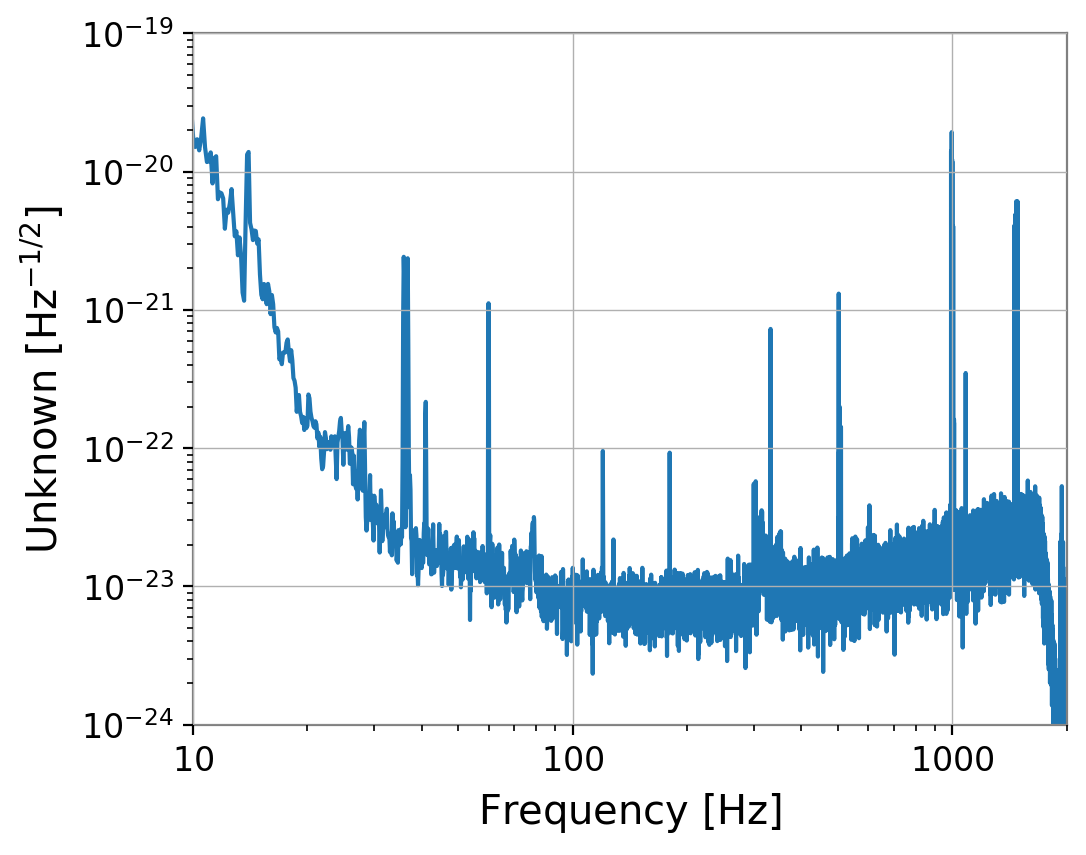

In [107]:
# -- Plot ASD
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)
plt.show()

As we can see, this is a situation where we have red noise. This means that there is the most power in the lower frequencies. If we apply a normalization (called whitening) we might be able to see the graviational wave "chirp" easier!

## Applying Whitening

Whitening makes the red noise appear to be normalized like you would with white noise. The data should be transformed to look like a flat line with deviations and spikes that we see in the red noise case.

In addition, we will apply a bandpass filter, which is when you pick a range of frequencies that you suspect the chirp would appear in and focus our analysis in that area. Data outside of this range will be dampened and values in the range will be amplified or given more attention.

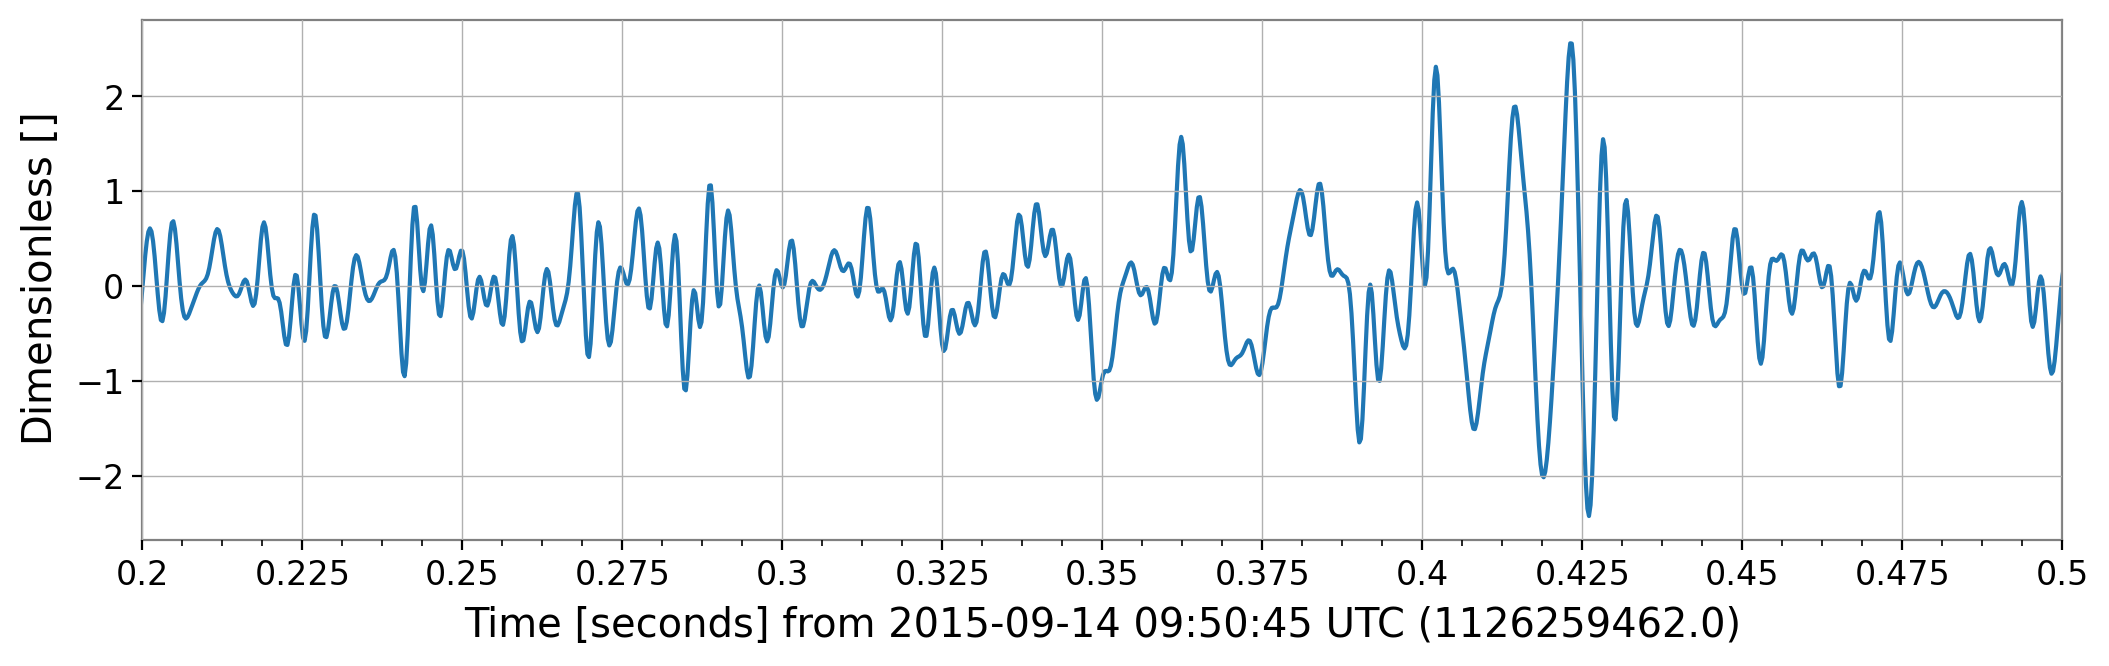

In [114]:
# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30,400) # we chose the 30 Hz to 400 Hz range for our bandpass filter
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)
plt.show()

Now you can see that the data has been stretched out to only be in the frequency range we chose, and we can see a gravitational wave at 0.425 seconds with a rapid increase in the amplitude and also the frequency.

We can now visualize the desired frequencies, their associated normalized energies, and their associated time using a colorplot:

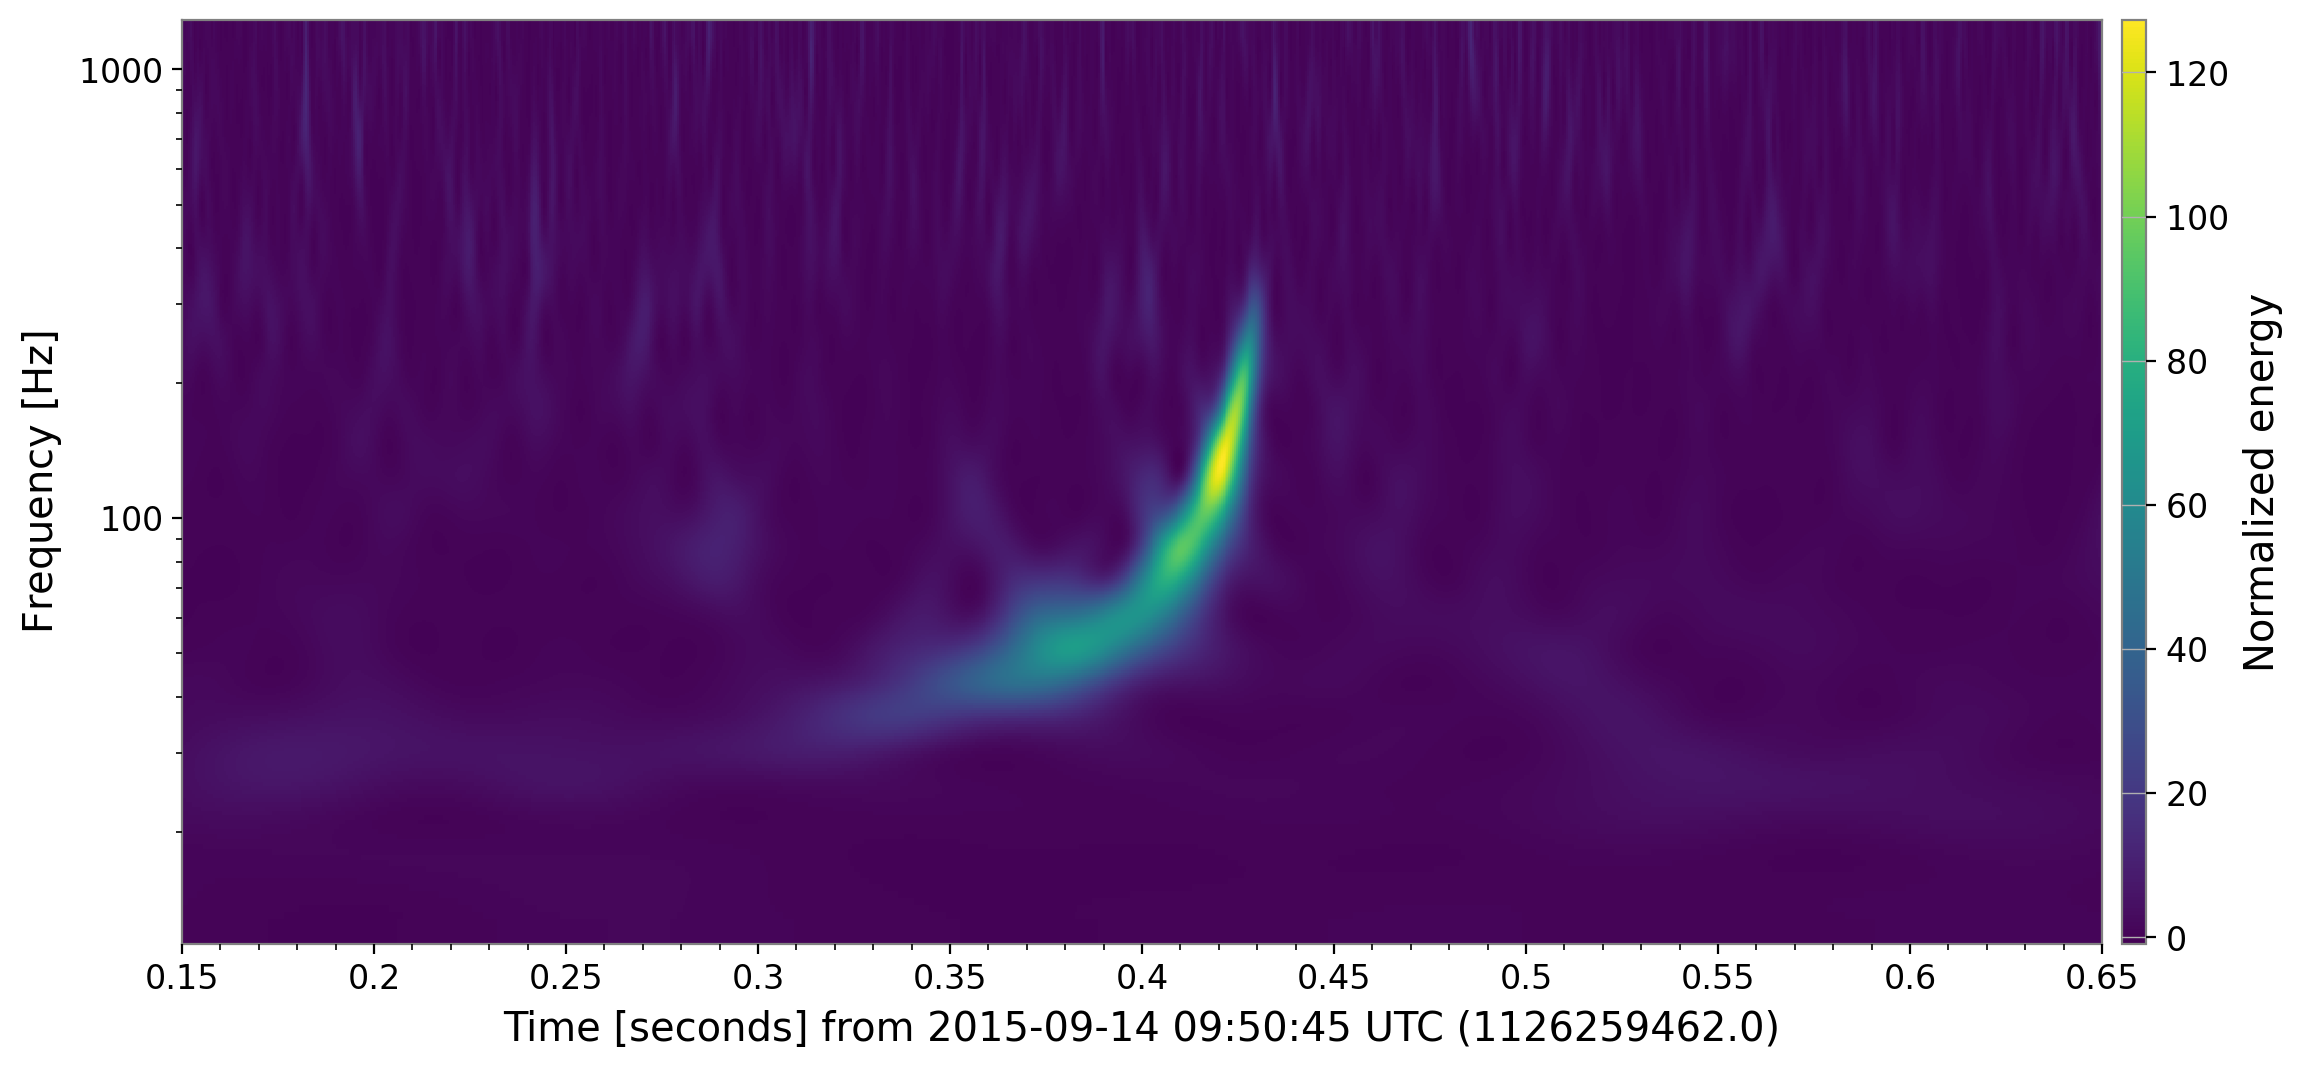

In [109]:
dt = 0.25  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
ax.grid(False)
ax.set_yscale('log')
try: fig4.colorbar(label="Normalized energy")
except: pass
plt.show()

This is the first chirp that LIGO detected and analyzed

## Our current works in progress

To build off of the LIGO data, we aimed to estimate some parameters of the binary merger such as the mass ratios and separations of the system leading up to the merger. This proved to be rather difficult to be completed and required much more supplemental theory and material.

Below is our attempt to fit a fourier transform to the data to collect data on the amplitudes of the gravitational wave.

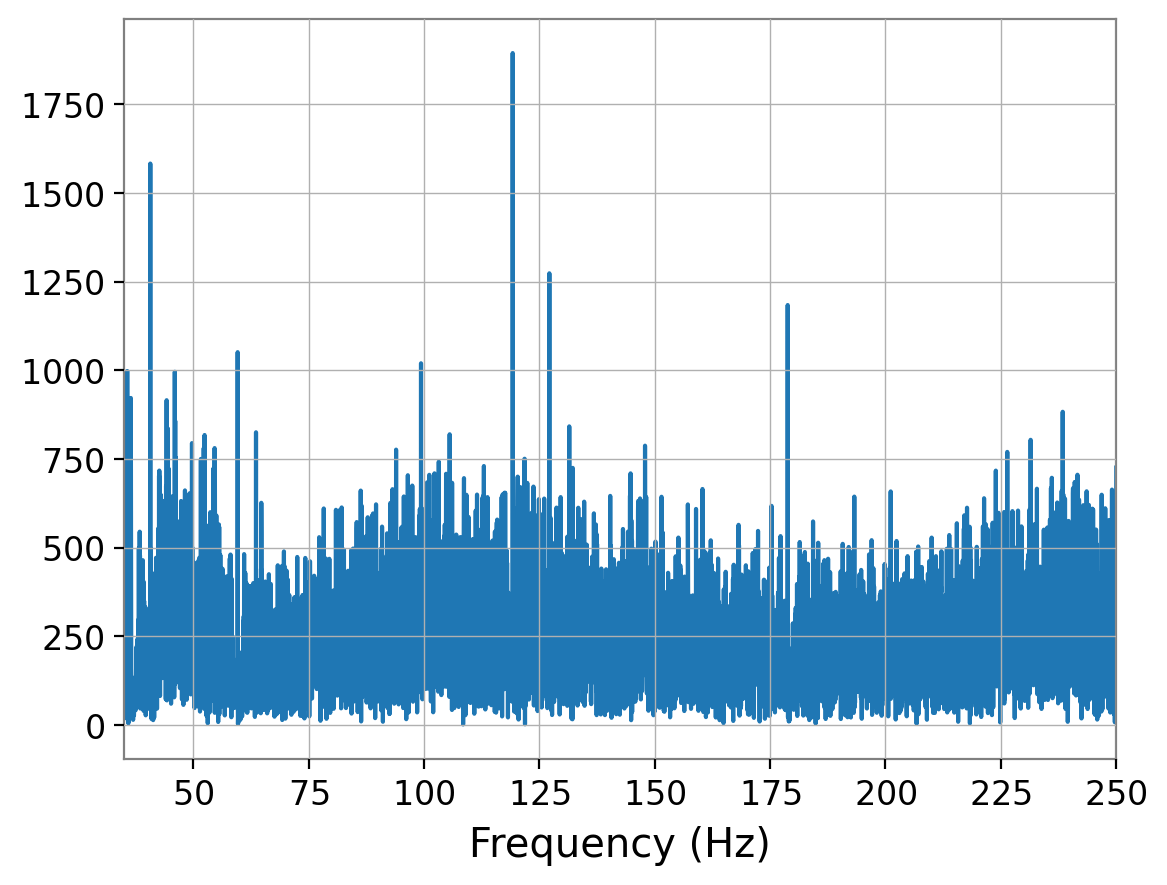

In [110]:
from scipy.fft import fft, fftfreq
import numpy as np

# general fitting data for scipy to use
duration = 1
sample_rate = 4069
N = 131072

# collecting the fitted frequencies
yf = fft(bp_data)
xf = fftfreq(N, 1/ sample_rate)[:N//2] # removing the negative symmetries (keeping only possitive outputs)
plt.xlabel("Frequency (Hz)")
plt.ylabel("")

plt.plot(xf, np.abs(yf[:N//2]))
plt.xlim(35,250)
plt.show()

While it is difficult to discern these values, we can see that there is a clear peak at around 120 Hz. This is visually seen as the midpoint of the energy density plot for frequencies.

## Section 3: Understanding and Analyzing the Data

In this section, you will learn:

1.   What are the types of disturbances detected by LIGO?
2.   How do we analyze LIGO data?

### 1. The Types of Disturbances Detected by LIGO

Some of the most common disturbances detected by LIGO are:

1.   **Compact Binary Inspiral Gravitational Waves**

    These are the types of gravitational waves that LIGO has detected this far. The three subclasses of compact binary systems are:
    - **Binary Neutron Star (BNS)** - two neutron stars in orbit.
    - **Binary Black Hole (BBH)** - two black holes in orbit.
    - **Neutron Star-Black Hole Binary (NSBH)** - a neutron star and a black hole in orbit.

2.   **Glitches (Koi Fish or Blips)**

    These glitches are disturbances with origins unknown to LIGO scientists. they are given this name because the energy density when plotted to create a chirp appears to look like a koi fish.

3.   **Terrestrial Interferences**

    Interferences on Earth such as large trucks driving by or earthquakes can create interferences which can look like gravitational waves.

### 2. How to Understand and Analyze LIGO Data

In the section above, we have plotted a gravitational wave which corresponds to a detected gravitational wave (GW170817). This is a highly researched gravitational wave, and is the final moments of a binary neutron star (BNS) merger. This particular detection was significant, as the merge was detected by many laboratories and methods of observation accross the world. If the event is observable, cross-referencing with other detectors and equiptment like telescopes is a good way to verify the event. This method is especially useful for measuring neutron star mergers. For non-observible events such as a binary black hole mergers, verifying the event is more difficult.

For binary black hole mergers, you can fit a fourier transform to the data, which allows us to estimate the mass ratios of the binary system before merging. In addition, cross examination through other methods (such as direct observation) is also a pivotal part of GW research.



## Section 4: Next Steps and Theories



### Different Analysis Focuses of LIGO Data ###

When approaching a new LIGO gravitational event or disturbance, the first goal is to figure out if the data is showing a real event or picking up excess noise. Through general relativity and analysis involving the schwarzchild radius for black holes, we know that gravitational wave frequencies peak in the 30-350 Hz range.

If we see irregular data in that frequency range, then we can proceed to see if a chirp is hiding in the data!

Next is to figure out what kind of noise we are dealing with. If the power sepctrum is dominated in the lower frequencies (lower wavelengths), then the data is considered to be showing red noise. If the power spectrum is dominated in the higher frequencies, then the data is showing blue noise. LIGO primarily shows red noise, as lower frequencies is what LIGO is sensitive to detecting.

We saw how we are able to whiten the data, or create a uniform distribution across all frequwncies that allows us to discern internal behaviors that would otherwise be drowned out by the dominated lower frequencies.

## Now You Try!

For the interactive portion of this lab, modify the above code with a different time period within our dataframe!

Other times that were suggested by the coding tutorial from the Gravitational Wave:
- t0 = 1126259462.4     -- GW150914
- t0 = 1187008882.4     -- GW170817
- t0 = 933200215        -- Loud hardware injection
- t0 = 1132401286.33    -- Koi Fish Glitch

Try implementing another type of plot or other visualization! Or try try to analyze other timeframes and see if you can detect your own event!

## Sources:

Primary Reference for Coding:
https://colab.research.google.com/github/gwosc-tutorial/quickview/blob/master/index.ipynb#scrollTo=U7cco8G1U6Bc


For GWOSC Documentation Help:
https://gwosc.readthedocs.io/en/stable/locate.html

Hanford Detector:
https://noirlab.edu/public/images/LIGO_Pic_16-CC/

Information on Interpreting LIGO Plots:
https://gwosc.org/plot_gallery/

Bandpassing Information:
https://gwosc.org/tutorial_bandpass/

Q-transforms:
https://dcc.ligo.org/public/0035/G030544/000/G030544-00.pdf
https://gwpy.github.io/docs/2.1.3/examples/timeseries/qscan/

Koi Fish Glitches: https://gswiki.ischool.syr.edu/en/Glitches/Koi_Fish

Noise: https://www.ligo.org/science/Publication-DataAnalysisGuide/

GW170817 Information: https://en.wikipedia.org/wiki/GW170817

modeling theory overview: https://mds.marshall.edu/cgi/viewcontent.cgi?article=1100&context=physics_faculty

scipy.fit.fft documentation: https://docs.scipy.org/doc/scipy/tutorial/fft.html




**Closing Remarks**

Thank you for using our tutorial that shows the background theory and steps for plotting a LIGO gravitational wave chirp. The coding section comes from the LIGO coding tutorials and libraries, but the theory and videos come from the sources above, and it is encouraged for the reader to read the source for whichever topic they want to explore more.

Graviational wave events are detected on a monthly basis, and as instrumentation improves, this frequency of detections will go up.